# **HOMEWORK 6** 

**VIGNESH PRABHAKAR**<br>
**USC ID:** : 4024890667


Mounted google drive into colab runtime

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# (1)(a)

Read the Breast Cancer Wisconsin dataset into a pandas dataframe and assigned column names to this dataframe based on the metadata given in the wdbc.names file

In [0]:
import pandas as pd

df=pd.read_csv('/gdrive/My Drive/Homeworks/hw6/wdbc.data',header=None)
df.columns=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Shape of the loaded dataframe

In [0]:
df.shape

(569, 32)

Target variable in this dataset is diagnosis and I have encoded the two classes in this target variable . Used 1 to represented malignancy class and 0 to represent the benign class .

In [0]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

Separated the positive instances of breast cancer from the negative instances and stored them in individual dataframes  

Shape of the dataset that contains the positive instances and shape of the dataset that contains the negative instances have been shown below

In [0]:
df_pos = df[df['diagnosis']== 1]
df_neg =df[df['diagnosis']== 0]

print(df_pos.shape)
print(df_neg.shape)

(212, 32)
(357, 32)


Train test split :

Use the first 20% of the positive and negative classes in the
file as the test set and the rest as the training set as instructed in the question .

In [0]:
import math

df_pos_20_test = df_pos.iloc[0:math.floor(0.20*212),:]
df_neg_20_test = df_neg.iloc[0:math.floor(0.20*357),:]

df_pos_20_train = df_pos.iloc[math.floor(0.20*212):len(df_pos),:]
df_neg_20_train = df_neg.iloc[math.floor(0.20*357):len(df_neg),:]

df_train = pd.concat([df_pos_20_train,df_neg_20_train])
df_test =pd.concat([df_pos_20_test,df_neg_20_test])
print(df_train.shape)
print(df_test.shape)

(456, 32)
(113, 32)


Separated the target variable diagnosis from the rest of the variables in both the training set as well as  the test set 

In [0]:
df_train_y = df_train['diagnosis']
df_test_y  = df_test['diagnosis']

df_train_x = df_train.drop(df_train.columns[[1]], axis=1)
df_test_x =df_test.drop(df_test.columns[[1]], axis=1)



Allocated lists for appending the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over  M runs when performing supervised learning

In [0]:
acc=[]
acc_tr=[]
precision=[]
precision_tr=[]
recall=[]
recall_tr=[]
f_score=[]
f_score_tr=[]
aucs=[]
aucs_tr=[]

# (1)(b)(i)

MONTE CARLO SIMULATION


Supervised Learning :

Normalized the data using a MinMaxScaler and then trained a L1-penalized SVM to classify the data. Utilized  5 fold cross validation to compute the cross val score for each fold and thereby select an ideal value for penalty parameter corresponding to the maximum cross validation score that is obtained .

Retrained the L1 penalized SVM model with the chosen value of lambda (penalty parameter) . Generated predictions for the test set from the trained model . Evaluated the performance of the model by computing the average accuracy, precision, recall, F-score, and AUC, for both training and test sets for each run of our monte carlo simulation



In [0]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import svm

C_vals=[0.001,0.01,0.1,1,10,100,1000]
monte_range=list(range(1,31))

for i in range(1,31):
  df_train_x,df_train_y = shuffle(df_train_x,df_train_y)
  df_test_x,df_test_y = shuffle(df_test_x,df_test_y)
  sc = MinMaxScaler()
  df_train_x = sc.fit_transform(df_train_x)
  df_test_x = sc.transform(df_test_x)
  l1svm_score=[]
  for k in C_vals:
    mdl = LinearSVC(C=k,penalty='l1',dual=False)
    l1svm_score.append(cross_val_score(mdl,df_train_x,df_train_y,cv=5).mean())

  C_chosen=C_vals[np.argmax([np.max(x) for x in l1svm_score])]
  mdl_1=LinearSVC(C=C_chosen,penalty='l1',dual=False)
  mdl_1=mdl_1.fit(df_train_x,df_train_y)
  preds_svm_train=mdl_1.predict(df_train_x)
  preds_svm_test=mdl_1.predict(df_test_x)
  acc_tr.append(mdl_1.score(df_train_x,df_train_y))
  acc.append(mdl_1.score(df_test_x,df_test_y))
  precision.append(precision_score(df_test_y, preds_svm_test, average='macro'))
  precision_tr.append(precision_score(df_train_y, preds_svm_train, average='macro'))
  recall.append(recall_score(df_test_y, preds_svm_test, average='macro'))
  recall_tr.append(recall_score(df_train_y, preds_svm_train, average='macro'))
  f_score.append(f1_score(df_test_y, preds_svm_test, average='macro'))
  f_score_tr.append(f1_score(df_train_y, preds_svm_train, average='macro'))
  fpr, tpr,_= roc_curve(df_test_y, preds_svm_test)
  fpr_tr, tpr_tr,_= roc_curve(df_train_y, preds_svm_train)
  aucs.append(auc(fpr,tpr))
  aucs_tr.append(auc(fpr_tr,tpr_tr))





/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The average of accuracy, precision, recall, F-score, and AUC, for training set over 30 runs of monte carlo simulation

Mean of the train accuracy :  0.9874269005847952 <br>
Std deviation of the train accuracy:  0.004196695934037222 <br>
Mean of the training precision :  0.9881768403946157 <br>
Std deviation of the training precision:  0.004857291624241342 <br>
Mean of the training recall :  0.9849664061428766 <br>
Std deviation of the training recall:  0.004348087742312903 <br>
Mean of the training f1-score :  0.9865154578745232 <br>
Std deviation of the training f1-score:  0.004508307604491447 <br>
Mean of the training auc :  0.9849664061428768 <br>
Std deviation of the training auc:  0.004348087742312885 <br>

In [0]:
print("Mean of the train accuracy : ",np.mean(acc_tr))
print("Std deviation of the train accuracy: ",np.std(acc_tr))
print("Mean of the training precision : ",np.mean(precision_tr))
print("Std deviation of the training precision: ",np.std(precision_tr))
print("Mean of the training recall : ",np.mean(recall_tr))
print("Std deviation of the training recall: ",np.std(recall_tr))
print("Mean of the training f1-score : ",np.mean(f_score_tr))
print("Std deviation of the training f1-score: ",np.std(f_score_tr))
print("Mean of the training auc : ",np.mean(aucs_tr))
print("Std deviation of the training auc: ",np.std(aucs_tr))

Mean of the train accuracy :  0.9874269005847952
Std deviation of the train accuracy:  0.004196695934037222
Mean of the training precision :  0.9881768403946157
Std deviation of the training precision:  0.004857291624241342
Mean of the training recall :  0.9849664061428766
Std deviation of the training recall:  0.004348087742312903
Mean of the training f1-score :  0.9865154578745232
Std deviation of the training f1-score:  0.004508307604491447
Mean of the training auc :  0.9849664061428768
Std deviation of the training auc:  0.004348087742312885


The average of accuracy, precision, recall, F-score, and AUC, for test set over 30 runs of monte carlo simulation <br>

Mean of the test accuracy :  0.9687315634218289<br>
Std deviation of the test accuracy:  0.015786534702371246<br>
Mean of the test precision :  0.9684297923268276<br>
Std deviation of the test precision:  0.02033350714929614<br>
Mean of the test recall :  0.9652302705119603<br>
Std deviation of the test recall:  0.013078935379957083<br>
Mean of the test f1-score :  0.9665606434647243<br>
Std deviation of the test f1-score:  0.016612315755366116<br>
Mean of the test auc :  0.9652302705119603<br>
Std deviation of the test auc:  0.013078935379957047<br>

In [0]:
print("Mean of the test accuracy : ",np.mean(acc))
print("Std deviation of the test accuracy: ",np.std(acc))
print("Mean of the test precision : ",np.mean(precision))
print("Std deviation of the test precision: ",np.std(precision))
print("Mean of the test recall : ",np.mean(recall))
print("Std deviation of the test recall: ",np.std(recall))
print("Mean of the test f1-score : ",np.mean(f_score))
print("Std deviation of the test f1-score: ",np.std(f_score))
print("Mean of the test auc : ",np.mean(aucs))
print("Std deviation of the test auc: ",np.std(aucs))


Mean of the test accuracy :  0.9687315634218289
Std deviation of the test accuracy:  0.015786534702371246
Mean of the test precision :  0.9684297923268276
Std deviation of the test precision:  0.02033350714929614
Mean of the test recall :  0.9652302705119603
Std deviation of the test recall:  0.013078935379957083
Mean of the test f1-score :  0.9665606434647243
Std deviation of the test f1-score:  0.016612315755366116
Mean of the test auc :  0.9652302705119603
Std deviation of the test auc:  0.013078935379957047


Accuracy ,precision, recall, F-score, and AUC for the training set over 30 iterations 

In [0]:
Monte_carlo_simulation_supervised_tr=pd.DataFrame({"Iteration no":monte_range,"Accuracy":acc_tr,"Precision" : precision_tr,"Recall":recall_tr,"F1-score":f_score_tr,"AUC":aucs_tr})
Monte_carlo_simulation_supervised_tr

,Iteration no,Accuracy,Precision,Recall,F1-score,AUC
0,1,0.991228,0.993103,0.988235,0.990575,0.988235
1,2,0.991228,0.993103,0.988235,0.990575,0.988235
2,3,0.991228,0.993103,0.988235,0.990575,0.988235
3,4,0.986842,0.987103,0.984739,0.985898,0.984739
4,5,0.991228,0.993103,0.988235,0.990575,0.988235
5,6,0.991228,0.993103,0.988235,0.990575,0.988235
6,7,0.984649,0.984156,0.982991,0.983567,0.982991
7,8,0.984649,0.984156,0.982991,0.983567,0.982991
8,9,0.991228,0.993103,0.988235,0.990575,0.988235
9,10,0.984649,0.984156,0.982991,0.983567,0.982991


Accuracy ,precision, recall, F-score, and AUC for the test set over 30 iterations 

In [0]:
Monte_carlo_simulation_supervised=pd.DataFrame({"Iteration no":monte_range,"Accuracy":acc,"Precision" : precision,"Recall":recall,"F1-score":f_score,"AUC":aucs})
Monte_carlo_simulation_supervised

,Iteration no,Accuracy,Precision,Recall,F1-score,AUC
0,1,0.955752,0.950831,0.955064,0.952858,0.955064
1,2,0.955752,0.950831,0.955064,0.952858,0.955064
2,3,0.955752,0.950831,0.955064,0.952858,0.955064
3,4,0.982301,0.986301,0.976190,0.980860,0.976190
4,5,0.955752,0.950831,0.955064,0.952858,0.955064
5,6,0.955752,0.950831,0.955064,0.952858,0.955064
6,7,0.982301,0.986301,0.976190,0.980860,0.976190
7,8,0.982301,0.986301,0.976190,0.980860,0.976190
8,9,0.955752,0.950831,0.955064,0.952858,0.955064
9,10,0.982301,0.986301,0.976190,0.980860,0.976190


Confusion matrix , ROC curve for observing the area under the curve with the  training set <br>

AUC : 0.99

Confusion Matrix :
 [[286   0]
 [  4 166]]


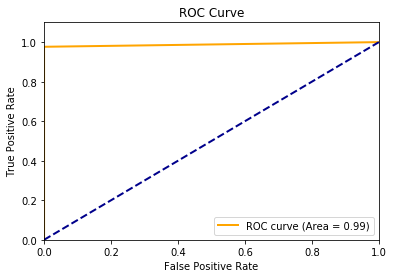

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_train_y, preds_svm_train)
print("Confusion Matrix :\n",confusion_mat)
plt.plot(fpr_tr, tpr_tr, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % aucs_tr[len(aucs)-1])
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

Confusion matrix ,ROC curve for observing the area under the curve with the test set <br>

AUC: 0.96

Confusion Matrix :
 [[68  3]
 [ 2 40]]


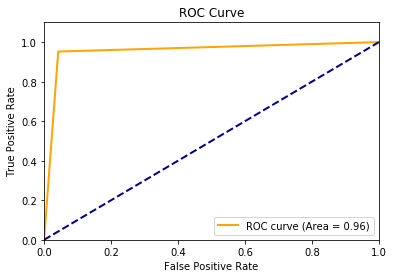

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test_y, preds_svm_test)
print("Confusion Matrix :\n",confusion_mat)
plt.plot(fpr, tpr, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % aucs[len(aucs)-1])
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

In [0]:
df_train_semi_y = df_train['diagnosis']
df_test_semi_y  = df_test['diagnosis']
df_train_semi_x = df_train.drop(df_train.columns[[1]], axis=1)
df_test_semi_x =df_test.drop(df_test.columns[[1]], axis=1)

Allocated lists for appending the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over  M runs when performing semi-supervised learning

In [0]:
acc_semi=[]
acc_semi_tr=[]
precision_semi=[]
precision_semi_tr=[]
recall_semi=[]
recall_semi_tr=[]
f_semi_score=[]
f_semi_score_tr=[]
aucs_semi=[]
aucs_semi_tr=[]

# (1)(b)(ii)

MONTE CARLO SIMULATION

Semi-Supervised Learning :

Utilized the previously normalized training data and test data . Split the training data further into labelled and unlabelled data . This is done to train the L1 penalized SVM model with the labelled data and generate predictions for the unlabelled data and if the predictions have been classified with a higher confidence ( The classified data point is situated far away from the separating hyperplane which is measured using the decision_function ) then that unlabelled data point is added to the set of labelled data points for retraining the model . This process is repeated until all the unlabelled data points have been added to the set of labelled data points and hence removed from the set of unlabelled data points . 

The final model which is a resultant of the above procedure is used to generate predictions on the test set . Thereafter I evaluated the performance of the model trained through this semi supervised learning procedure by computing the average accuracy, precision, recall, F-score, and AUC, for both training and test sets for each run of our monte carlo simulation

In [0]:
colso=['id','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

C_vals=[0.001,0.01,0.1,1,10,100,1000]
for i in range(1,31):
  df_train_semi_x,df_train_semi_y = shuffle(df_train_semi_x,df_train_semi_y)
  df_test_semi_x,df_test_semi_y = shuffle(df_test_semi_x,df_test_semi_y)
  label_x, unlabel_x, label_y, unlabel_y = train_test_split(df_train_semi_x, df_train_semi_y, test_size=0.50, stratify=df_train_semi_y)
  label_x=label_x.reset_index(drop=True)
  label_y=label_y.reset_index(drop=True)
  unlabel_x=unlabel_x.reset_index(drop=True)
  unlabel_y=pd.DataFrame(unlabel_y)
  unlabel_y=unlabel_y.reset_index(drop=True)
  l1svm_semi_score=[]
  for k in C_vals:
    mdl = LinearSVC(C=k,penalty='l1',dual=False)
    l1svm_semi_score.append(cross_val_score(mdl,label_x,label_y,cv=5).mean())
  
  C_chosen=C_vals[np.argmax([np.max(x) for x in l1svm_semi_score])]
  mdl_2=LinearSVC(C=C_chosen,penalty='l1',dual=False)
  mdl_2=mdl_2.fit(label_x,label_y)

  label_x_update=pd.DataFrame()
  label_x_update=pd.concat([label_x,label_x_update],axis=0,ignore_index=True)

  label_y_update=pd.DataFrame()
  label_y=label_y.rename(columns = [0])
  label_y=pd.DataFrame(label_y)
  label_y_update=pd.concat([label_y,label_y_update],axis=0,ignore_index=True)

  while(len(unlabel_x)!=0):
    dist=mdl_2.decision_function(unlabel_x)
    distant_unlabelled_pt=np.array(unlabel_x.iloc[np.argmax(np.absolute(mdl_2.decision_function(unlabel_x)))])
    distant_unlabelled_pt=distant_unlabelled_pt.reshape(1,-1)
    
    pred_svm_unlabel = mdl_2.predict(distant_unlabelled_pt)
    distant_unlabelled_pt=pd.DataFrame(distant_unlabelled_pt,columns=colso)

    label_x_update=pd.concat([label_x_update,distant_unlabelled_pt],axis=0,ignore_index=True)   

    distant_unlabelled_pt_y=np.array(pred_svm_unlabel)
    distant_unlabelled_pt_y=distant_unlabelled_pt_y.reshape(1,-1)
    distant_unlabelled_pt_y=pd.DataFrame(distant_unlabelled_pt_y)
    label_y_update=pd.concat([label_y_update,distant_unlabelled_pt_y],axis=0,ignore_index=True)
    
    mdl_2=mdl_2.fit(label_x_update,label_y_update)

    unlabel_x=unlabel_x.drop(index=np.argmax(np.absolute(dist)))
    unlabel_y=unlabel_y.drop(index=np.argmax(np.absolute(dist)))
    unlabel_x=unlabel_x.reset_index(drop=True)
    unlabel_y=unlabel_y.reset_index(drop=True)

  preds_svm_semi_train=mdl_2.predict(df_train_semi_x)
  preds_svm_semi_test=mdl_2.predict(df_test_semi_x)
  acc_semi_tr.append(mdl_2.score(df_train_semi_x,df_train_semi_y))
  acc_semi.append(mdl_2.score(df_test_semi_x,df_test_semi_y))
  precision_semi.append(precision_score(df_test_semi_y, preds_svm_semi_test, average='macro'))
  precision_semi_tr.append(precision_score(df_train_semi_y, preds_svm_semi_train, average='macro'))
  recall_semi.append(recall_score(df_test_semi_y, preds_svm_semi_test, average='macro'))
  recall_semi_tr.append(recall_score(df_train_semi_y, preds_svm_semi_train, average='macro'))
  f_semi_score.append(f1_score(df_test_semi_y, preds_svm_semi_test, average='macro'))
  f_semi_score_tr.append(f1_score(df_train_semi_y, preds_svm_semi_train, average='macro'))
  fpr, tpr,_= roc_curve(df_test_semi_y, preds_svm_semi_test)
  fpr_tr, tpr_tr,_= roc_curve(df_train_semi_y, preds_svm_semi_train)
  aucs_semi.append(auc(fpr,tpr))
  aucs_semi_tr.append(auc(fpr_tr,tpr_tr))




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

The average of accuracy, precision, recall, F-score, and AUC, for training set over 30 runs of monte carlo simulation <br>

Mean of the train accuracy :  0.9709795321637426 <br>
Std deviation of the train accuracy:  0.007736460299198984 <br>
Mean of the training precision :  0.9736154325537391 <br>
Std deviation of the training precision:  0.007627601041416684 <br>
Mean of the training recall :  0.9646174413821473 <br>
Std deviation of the training recall:  0.009770405838790403 <br>
Mean of the training f1-score :  0.9686644879260352 <br>
Std deviation of the training f1-score:  0.00845197619622859 <br>
Mean of the training auc :  0.9646174413821474 <br>
Std deviation of the training auc:  0.009770405838790438 <br>

In [0]:
print("Mean of the train accuracy : ",np.mean(acc_semi_tr))
print("Std deviation of the train accuracy: ",np.std(acc_semi_tr))
print("Mean of the training precision : ",np.mean(precision_semi_tr))
print("Std deviation of the training precision: ",np.std(precision_semi_tr))
print("Mean of the training recall : ",np.mean(recall_semi_tr))
print("Std deviation of the training recall: ",np.std(recall_semi_tr))
print("Mean of the training f1-score : ",np.mean(f_semi_score_tr))
print("Std deviation of the training f1-score: ",np.std(f_semi_score_tr))
print("Mean of the training auc : ",np.mean(aucs_semi_tr))
print("Std deviation of the training auc: ",np.std(aucs_semi_tr))

Mean of the train accuracy :  0.9709795321637426
Std deviation of the train accuracy:  0.007736460299198984
Mean of the training precision :  0.9736154325537391
Std deviation of the training precision:  0.007627601041416684
Mean of the training recall :  0.9646174413821473
Std deviation of the training recall:  0.009770405838790403
Mean of the training f1-score :  0.9686644879260352
Std deviation of the training f1-score:  0.00845197619622859
Mean of the training auc :  0.9646174413821474
Std deviation of the training auc:  0.009770405838790438


The average of accuracy, precision, recall, F-score, and AUC, for training set over 30 runs of monte carlo simulation <br>

Mean of the test accuracy :  0.9575221238938053<br>
Std deviation of the test accuracy:  0.014701989137908072<br>
Mean of the test precision :  0.9569320328887992<br>
Std deviation of the test precision:  0.016555760010907097<br>
Mean of the test recall :  0.9524200760116254<br>
Std deviation of the test recall:  0.016168650328979225<br>
Mean of the test f1-score :  0.9543205133503492<br>
Std deviation of the test f1-score:  0.015856792766296538<br>
Mean of the test auc :  0.9524200760116254<br>
Std deviation of the test auc:  0.016168650328979236 <br>

In [0]:
print("Mean of the test accuracy : ",np.mean(acc_semi))
print("Std deviation of the test accuracy: ",np.std(acc_semi))
print("Mean of the test precision : ",np.mean(precision_semi))
print("Std deviation of the test precision: ",np.std(precision_semi))
print("Mean of the test recall : ",np.mean(recall_semi))
print("Std deviation of the test recall: ",np.std(recall_semi))
print("Mean of the test f1-score : ",np.mean(f_semi_score))
print("Std deviation of the test f1-score: ",np.std(f_semi_score))
print("Mean of the test auc : ",np.mean(aucs_semi))
print("Std deviation of the test auc: ",np.std(aucs_semi))

Mean of the test accuracy :  0.9575221238938053
Std deviation of the test accuracy:  0.014701989137908072
Mean of the test precision :  0.9569320328887992
Std deviation of the test precision:  0.016555760010907097
Mean of the test recall :  0.9524200760116254
Std deviation of the test recall:  0.016168650328979225
Mean of the test f1-score :  0.9543205133503492
Std deviation of the test f1-score:  0.015856792766296538
Mean of the test auc :  0.9524200760116254
Std deviation of the test auc:  0.016168650328979236


Accuracy ,precision, recall, F-score, and AUC for the training set over 30 iterations 

In [0]:
Monte_carlo_simulation_semisupervised_tr=pd.DataFrame({"Iteration no":monte_range,"Accuracy":acc_semi_tr,"Precision" : precision_semi_tr,"Recall":recall_semi_tr,"F1-score":f_semi_score_tr,"AUC":aucs_semi_tr})
Monte_carlo_simulation_semisupervised_tr

,Iteration no,Accuracy,Precision,Recall,F1-score,AUC
0,1,0.960526,0.962459,0.953023,0.957374,0.953023
1,2,0.967105,0.968959,0.960654,0.964524,0.960654
2,3,0.971491,0.978261,0.961765,0.969011,0.961765
3,4,0.975877,0.973684,0.974805,0.974239,0.974805
4,5,0.978070,0.977679,0.975360,0.976496,0.975360
5,6,0.969298,0.975023,0.960016,0.966672,0.960016
6,7,0.971491,0.968045,0.971308,0.969626,0.971308
7,8,0.982456,0.984965,0.977664,0.981104,0.977664
8,9,0.971491,0.973733,0.965343,0.969254,0.965343
9,10,0.980263,0.984746,0.973529,0.978660,0.973529


Accuracy ,precision, recall, F-score, and AUC for the test set over 30 iterations 

In [0]:
Monte_carlo_simulation_semisupervised=pd.DataFrame({"Iteration no":monte_range,"Accuracy":acc_semi,"Precision" : precision_semi,"Recall":recall_semi,"F1-score":f_semi_score,"AUC":aucs_semi})
Monte_carlo_simulation_semisupervised

,Iteration no,Accuracy,Precision,Recall,F1-score,AUC
0,1,0.938053,0.940575,0.926392,0.932652,0.926392
1,2,0.982301,0.986301,0.976190,0.980860,0.976190
2,3,0.946903,0.943159,0.943159,0.943159,0.943159
3,4,0.964602,0.966952,0.957243,0.961721,0.957243
4,5,0.973451,0.973916,0.969148,0.971438,0.969148
5,6,0.955752,0.950831,0.955064,0.952858,0.955064
6,7,0.946903,0.940053,0.948021,0.943688,0.948021
7,8,0.955752,0.950831,0.955064,0.952858,0.955064
8,9,0.982301,0.986301,0.976190,0.980860,0.976190
9,10,0.973451,0.973916,0.969148,0.971438,0.969148


Confusion matrix ,ROC curve for observing the area under the curve with the training set <br>

AUC: 0.97

Confusion Matrix :
 [[285   1]
 [ 10 160]]


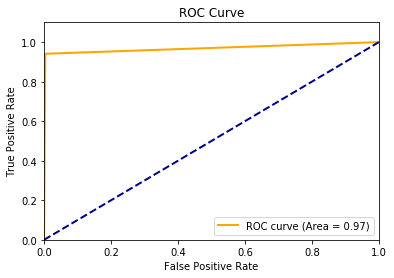

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_train_semi_y, preds_svm_semi_train)
print("Confusion Matrix :\n",confusion_mat)
plt.plot(fpr_tr, tpr_tr, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % aucs_semi_tr[len(aucs_semi_tr)-1])
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

Confusion matrix ,ROC curve for observing the area under the curve with the test set <br>

AUC: 0.95

Confusion Matrix :
 [[71  0]
 [ 4 38]]


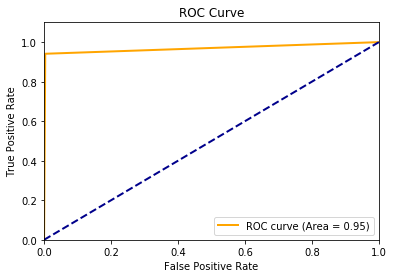

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test_semi_y, preds_svm_semi_test)
print("Confusion Matrix :\n",confusion_mat)
plt.plot(fpr_tr, tpr_tr, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % aucs_semi[len(aucs_semi)-1])
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

# (1)(b)(iii)

In [0]:
df_train_y = df_train['diagnosis']
df_test_y  = df_test['diagnosis']

df_train_x = df_train.drop(df_train.columns[[1]], axis=1)
df_test_x =df_test.drop(df_test.columns[[1]], axis=1)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

Allocated lists for appending the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over  M runs when performing unsupervised learning (K -Means clustering)

In [0]:
acc_un=[]
acc_un_tr=[]
precision_un=[]
precision_un_tr=[]
recall_un=[]
recall_un_tr=[]
f_un_score=[]
f_un_score_tr=[]
aucs_un=[]
aucs_un_tr=[]

MONTE CARLO ESTIMATION:

Unsupervised learning ( K-Means Clustering):

Fit the K-Means model with train_x and fixing K as 2. Computed the 30 nearest data points to both the cluster centers using NearestNeighbors algorithm . Stored the indices of the same in a separate variable and selected the data points corresponding to these indices from the training data. Found out the majority label from each cluster and assigned them as the predictions on the train_data. Generated the test set predictions by performing kmean_model.predict() on test_x  .

Thereafter I evaluated the performance of the model trained through this semi supervised learning procedure by computing the average accuracy, precision, recall, F-score, and AUC, for both training and test sets for each run of our monte carlo simulation

**To reduce the chances of the K-Means algorithm being trapped in a local minimum, we can randomize the cluster assignments and perform clustering repeatedly although K-Means clustering in general obeys a heuristic approach and might still end up getting trapped in a local minima regardless of this procedure**


In [0]:
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

for i in range(1,31):
  df_train_x,df_train_y = shuffle(df_train_x,df_train_y)
  df_test_x,df_test_y = shuffle(df_test_x,df_test_y)

  mdl_k_means = KMeans(n_clusters=2,init='k-means++',random_state=random.randint(20,200),n_init=20).fit(df_train_x)
  dist= mdl_k_means.transform(df_train_x)
  knn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(df_train_x)
  distance, ind = knn.kneighbors(mdl_k_means.cluster_centers_)
  clus1=df_train_y.loc[ind[1]]
  clus0=df_train_y.loc[ind[0]]

  majority_clus1 = clus1.value_counts()
  majority_clus0 = clus0.value_counts()
  preds= mdl_k_means.labels_
  preds= pd.DataFrame(preds)

  preds_0=preds[preds[0]== 0]
  preds_1=preds[preds[0]== 1]

  max_1=np.argmax(majority_clus1)
  max_0=np.argmax(majority_clus0)
  preds_0[0]=max_0
  preds_1[0]=max_1

  train_preds=pd.concat([preds_0[0],preds_1[0]],axis=0)
  train_preds=train_preds.sort_index()
  test_preds=mdl_k_means.predict(df_test_x)

  acc_un_tr.append(accuracy_score(df_train_y,train_preds))
  acc_un.append(accuracy_score(df_test_y,test_preds))
  precision_un.append(precision_score(df_test_y, test_preds, average='macro'))
  precision_un_tr.append(precision_score(df_train_y, train_preds, average='macro'))
  recall_un.append(recall_score(df_test_y,test_preds, average='macro'))
  recall_un_tr.append(recall_score(df_train_y,train_preds, average='macro'))
  f_un_score.append(f1_score(df_test_y,test_preds, average='macro'))
  f_un_score_tr.append(f1_score(df_train_y,train_preds, average='macro'))
  fpr, tpr,_= roc_curve(df_test_y,test_preds)
  fpr_tr,tpr_tr,_= roc_curve(df_train_y,train_preds)
  aucs_un.append(auc(fpr,tpr))
  aucs_un_tr.append(auc(fpr_tr,tpr_tr))


The average of accuracy, precision, recall, F-score, and AUC, for training set over 30 runs of monte carlo simulation <br>

Mean of the train accuracy :  0.5849415204678362<br>
Std deviation of the train accuracy:  0.09585437986225638<br>
Mean of the training precision :  0.3943721626960765<br>
Std deviation of the training precision:  0.11474346255980372<br>
Mean of the training recall :  0.5005141916906622<br>
Std deviation of the training recall:  0.004850874707968218<br>
Mean of the training f1-score :  0.37438300307154954<br>
Std deviation of the training f1-score:  0.04323318308613992<br>
Mean of the training auc :  0.5005141916906622<br>
Std deviation of the training auc:  0.004850874707968218<br>

In [0]:
print("Mean of the train accuracy : ",np.mean(acc_un_tr))
print("Std deviation of the train accuracy: ",np.std(acc_un_tr))
print("Mean of the training precision : ",np.mean(precision_un_tr))
print("Std deviation of the training precision: ",np.std(precision_un_tr))
print("Mean of the training recall : ",np.mean(recall_un_tr))
print("Std deviation of the training recall: ",np.std(recall_un_tr))
print("Mean of the training f1-score : ",np.mean(f_un_score_tr))
print("Std deviation of the training f1-score: ",np.std(f_un_score_tr))
print("Mean of the training auc : ",np.mean(aucs_un_tr))
print("Std deviation of the training auc: ",np.std(aucs_un_tr))

Mean of the train accuracy :  0.5849415204678362
Std deviation of the train accuracy:  0.09585437986225638
Mean of the training precision :  0.3943721626960765
Std deviation of the training precision:  0.11474346255980372
Mean of the training recall :  0.5005141916906622
Std deviation of the training recall:  0.004850874707968218
Mean of the training f1-score :  0.37438300307154954
Std deviation of the training f1-score:  0.04323318308613992
Mean of the training auc :  0.5005141916906622
Std deviation of the training auc:  0.004850874707968218


The average of accuracy, precision, recall, F-score, and AUC, for test set over 30 runs of monte carlo simulation <br>

Mean of the test accuracy :  0.5958702064896755<br>
Std deviation of the test accuracy:  0.055186687120559595<br>
Mean of the test precision :  0.336036036036036<br>
Std deviation of the test precision:  0.09438415029700034<br>
Mean of the test recall :  0.48779342723004687<br>
Std deviation of the test recall:  0.007026586641828989<br>
Mean of the test f1-score :  0.37397329145918995<br>
Std deviation of the test f1-score:  0.01926050939842577<br>
Mean of the test auc :  0.48779342723004687<br>
Std deviation of the test auc:  0.007026586641828989<br>

In [0]:
print("Mean of the test accuracy : ",np.mean(acc_un))
print("Std deviation of the test accuracy: ",np.std(acc_un))
print("Mean of the test precision : ",np.mean(precision_un))
print("Std deviation of the test precision: ",np.std(precision_un))
print("Mean of the test recall : ",np.mean(recall_un))
print("Std deviation of the test recall: ",np.std(recall_un))
print("Mean of the test f1-score : ",np.mean(f_un_score))
print("Std deviation of the test f1-score: ",np.std(f_un_score))
print("Mean of the test auc : ",np.mean(aucs_un))
print("Std deviation of the test auc: ",np.std(aucs_un))

Mean of the test accuracy :  0.5958702064896755
Std deviation of the test accuracy:  0.055186687120559595
Mean of the test precision :  0.336036036036036
Std deviation of the test precision:  0.09438415029700034
Mean of the test recall :  0.48779342723004687
Std deviation of the test recall:  0.007026586641828989
Mean of the test f1-score :  0.37397329145918995
Std deviation of the test f1-score:  0.01926050939842577
Mean of the test auc :  0.48779342723004687
Std deviation of the test auc:  0.007026586641828989


Accuracy ,precision, recall, F-score, and AUC for the training set over 30 iterations 

In [0]:
monte_range=list(range(1,31))
Monte_carlo_simulation_unsupervised_tr=pd.DataFrame({"Iteration no":monte_range,"Accuracy":acc_un_tr,"Precision" : precision_un_tr,"Recall":recall_un_tr,"F1-score":f_un_score_tr,"AUC":aucs_un_tr})
Monte_carlo_simulation_unsupervised_tr

,Iteration no,Accuracy,Precision,Recall,F1-score,AUC
0,1,0.629386,0.593214,0.507713,0.412653,0.507713
1,2,0.627193,0.313596,0.500000,0.385445,0.500000
2,3,0.627193,0.313596,0.500000,0.385445,0.500000
3,4,0.627193,0.313596,0.500000,0.385445,0.500000
4,5,0.370614,0.406786,0.492287,0.280982,0.492287
5,6,0.627193,0.313596,0.500000,0.385445,0.500000
6,7,0.627193,0.313596,0.500000,0.385445,0.500000
7,8,0.629386,0.593214,0.507713,0.412653,0.507713
8,9,0.629386,0.593214,0.507713,0.412653,0.507713
9,10,0.629386,0.593214,0.507713,0.412653,0.507713


Accuracy ,precision, recall, F-score, and AUC for the test set over 30 iterations 

In [0]:
Monte_carlo_simulation_unsupervised=pd.DataFrame({"Iteration no":monte_range,"Accuracy":acc_un,"Precision" : precision_un,"Recall":recall_un,"F1-score":f_un_score,"AUC":aucs_un})
Monte_carlo_simulation_unsupervised

,Iteration no,Accuracy,Precision,Recall,F1-score,AUC
0,1,0.610619,0.310811,0.485915,0.379121,0.485915
1,2,0.610619,0.310811,0.485915,0.379121,0.485915
2,3,0.389381,0.689189,0.514085,0.301907,0.514085
3,4,0.610619,0.310811,0.485915,0.379121,0.485915
4,5,0.610619,0.310811,0.485915,0.379121,0.485915
5,6,0.610619,0.310811,0.485915,0.379121,0.485915
6,7,0.610619,0.310811,0.485915,0.379121,0.485915
7,8,0.610619,0.310811,0.485915,0.379121,0.485915
8,9,0.610619,0.310811,0.485915,0.379121,0.485915
9,10,0.610619,0.310811,0.485915,0.379121,0.485915


Confusion matrix ,ROC curve for observing the area under the curve with the training set <br>

AUC: 0.49

Confusion Matrix :
 [[  4 282]
 [  5 165]]


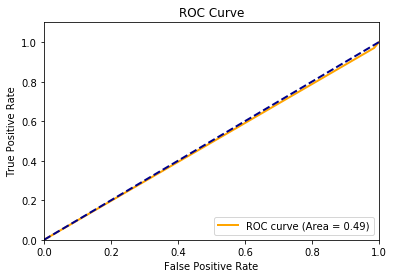

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_train_y,train_preds)
print("Confusion Matrix :\n",confusion_mat)
plt.plot(fpr_tr, tpr_tr, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % aucs_un_tr[len(aucs_un_tr)-1])
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

Confusion matrix ,ROC curve for observing the area under the curve with the test set <br>

AUC: 0.49

Confusion Matrix :
 [[69  2]
 [42  0]]


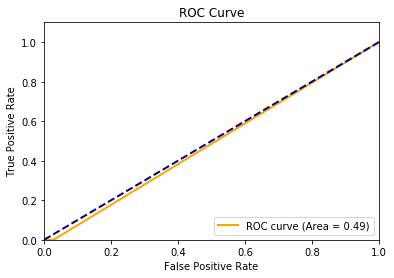

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test_y,test_preds)
print("Confusion Matrix :\n",confusion_mat)
plt.plot(fpr, tpr, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % aucs_un[len(aucs_un)-1])
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

# (1)(b)(iv)

Allocated lists for appending the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over  M runs when performing spectral clustering

In [0]:
from sklearn.cluster import SpectralClustering

In [0]:
acc_sp=[]
acc_sp_tr=[]
precision_sp=[]
precision_sp_tr=[]
recall_sp=[]
recall_sp_tr=[]
f_sp_score=[]
f_sp_score_tr=[]
aucs_sp=[]
aucs_sp_tr=[]

MONTE CARLO SIMULATION:

Spectral Clustering :

Fit the Spectral Clustering model with train_x . Specified the number of clusters as 2 , affinity as rbf and gamma value as 1  as it had been instructed in the question . Stored the labels assigned by the spectral clustering model while training in a separate variable . Distinguished between the data points that have been assigned different cluster numbers through their indices and stored them in separate variables for cluster 0 assignement and cluster 1 assignment respectively .

Thereafter assigned mean of the data points in each cluster as the cluster center and found out the majority label among each cluster and then compared it with the predicted label.  Utilized mdl.fit_predict(test_x) instead of mdl.predict( ) in order to obtain the predicted labels from the spectral clustering model .

Eventually I evaluated the performance of the model trained through this semi supervised learning procedure by computing the average accuracy, precision, recall, F-score, and AUC, for both training and test sets for each run of our monte carlo simulation


In [0]:
for i in range(1,31):
  df_train_x,df_train_y = shuffle(df_train_x,df_train_y)
  df_test_x,df_test_y = shuffle(df_test_x,df_test_y)

  mdl_spec=SpectralClustering(n_clusters=2,affinity='rbf',n_init=20,gamma=1,random_state=random.randint(20,200)).fit(df_train_x)
  clus_labels=pd.DataFrame(mdl_spec.labels_)
 
  label0_indices=clus_labels[clus_labels[0]==0].index
  label1_indices=clus_labels[clus_labels[0]==1].index
    
  clus0=df_train_x.iloc[label0_indices,:]
  clus1=df_train_x.iloc[label1_indices,:]
    
  center0=clus0.mean(axis=0)
  center1=clus1.mean(axis=0)
    
  cluster_centers=pd.DataFrame()
  cluster_centers[0]=center0
  cluster_centers[1]=center1

  knn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(df_train_x)
  distance, ind = knn.kneighbors(cluster_centers.T)
  clus1=df_train_y.loc[ind[1]]
  clus0=df_train_y.loc[ind[0]]

  majority_clus1 = clus1.value_counts()
  majority_clus0 = clus0.value_counts()
  preds= mdl_spec.labels_
  preds= pd.DataFrame(preds)

  preds_0=preds[preds[0]== 0]
  preds_1=preds[preds[0]== 1]

  max_1=np.argmax(majority_clus1)
  max_0=np.argmax(majority_clus0)
  preds_0[0]=max_0
  preds_1[0]=max_1

  train_preds=pd.concat([preds_0[0],preds_1[0]],axis=0)
  train_preds=train_preds.sort_index()
  test_preds=mdl_spec.fit_predict(df_test_x)

  acc_sp_tr.append(accuracy_score(df_train_y,train_preds))
  acc_sp.append(accuracy_score(df_test_y,test_preds))
  precision_sp.append(precision_score(df_test_y, test_preds, average='macro'))
  precision_sp_tr.append(precision_score(df_train_y, train_preds, average='macro'))
  recall_sp.append(recall_score(df_test_y,test_preds, average='macro'))
  recall_sp_tr.append(recall_score(df_train_y,train_preds, average='macro'))
  f_sp_score.append(f1_score(df_test_y,test_preds, average='macro'))
  f_sp_score_tr.append(f1_score(df_train_y,train_preds, average='macro'))
  fpr, tpr,_= roc_curve(df_test_y,test_preds)
  fpr_tr,tpr_tr,_= roc_curve(df_train_y,train_preds)
  aucs_sp.append(auc(fpr,tpr))
  aucs_sp_tr.append(auc(fpr_tr,tpr_tr))


The average of accuracy, precision, recall, F-score, and AUC, for training set over 30 runs of monte carlo simulation <br>

Mean of the train accuracy :  0.5845029239766081 <br>
Std deviation of the train accuracy:  0.09351423936852017 <br>
Mean of the training precision :  0.34234291676327383 <br>
Std deviation of the training precision:  0.11921448719215895 <br>
Mean of the training recall :  0.49976689976689975 <br>
Std deviation of the training recall:  0.0017904768643050447 <br>
Mean of the training f1-score :  0.3669695271227159 <br>
Std deviation of the training f1-score:  0.04060366304753478 <br>
Mean of the training auc :  0.49976689976689975 <br>
Std deviation of the training auc:  0.0017904768643050447 <br>

In [0]:
print("Mean of the train accuracy : ",np.mean(acc_sp_tr))
print("Std deviation of the train accuracy: ",np.std(acc_sp_tr))
print("Mean of the training precision : ",np.mean(precision_sp_tr))
print("Std deviation of the training precision: ",np.std(precision_sp_tr))
print("Mean of the training recall : ",np.mean(recall_sp_tr))
print("Std deviation of the training recall: ",np.std(recall_sp_tr))
print("Mean of the training f1-score : ",np.mean(f_sp_score_tr))
print("Std deviation of the training f1-score: ",np.std(f_sp_score_tr))
print("Mean of the training auc : ",np.mean(aucs_sp_tr))
print("Std deviation of the training auc: ",np.std(aucs_sp_tr))

Mean of the train accuracy :  0.5845029239766081
Std deviation of the train accuracy:  0.09351423936852017
Mean of the training precision :  0.34234291676327383
Std deviation of the training precision:  0.11921448719215895
Mean of the training recall :  0.49976689976689975
Std deviation of the training recall:  0.0017904768643050447
Mean of the training f1-score :  0.3669695271227159
Std deviation of the training f1-score:  0.04060366304753478
Mean of the training auc :  0.49976689976689975
Std deviation of the training auc:  0.0017904768643050447


The average of accuracy, precision, recall, F-score, and AUC, for test set over 30 runs of monte carlo simulation  <br>

Mean of the test accuracy :  0.6032448377581121 <br>
Std deviation of the test accuracy:  0.039713604772378334<br>
Mean of the test precision :  0.3234234234234234<br>
Std deviation of the test precision:  0.06792099756746223<br>
Mean of the test recall :  0.48685446009389666<br>
Std deviation of the test recall:  0.005056492776652111<br>
Mean of the test f1-score :  0.3765470852900346<br>
Std deviation of the test f1-score:  0.01386030395868422<br>
Mean of the test auc :  0.48685446009389666<br>
Std deviation of the test auc:  0.005056492776652111<br>

In [0]:
print("Mean of the test accuracy : ",np.mean(acc_sp))
print("Std deviation of the test accuracy: ",np.std(acc_sp))
print("Mean of the test precision : ",np.mean(precision_sp))
print("Std deviation of the test precision: ",np.std(precision_sp))
print("Mean of the test recall : ",np.mean(recall_sp))
print("Std deviation of the test recall: ",np.std(recall_sp))
print("Mean of the test f1-score : ",np.mean(f_sp_score))
print("Std deviation of the test f1-score: ",np.std(f_sp_score))
print("Mean of the test auc : ",np.mean(aucs_sp))
print("Std deviation of the test auc: ",np.std(aucs_sp))

Mean of the test accuracy :  0.6032448377581121
Std deviation of the test accuracy:  0.039713604772378334
Mean of the test precision :  0.3234234234234234
Std deviation of the test precision:  0.06792099756746223
Mean of the test recall :  0.48685446009389666
Std deviation of the test recall:  0.005056492776652111
Mean of the test f1-score :  0.3765470852900346
Std deviation of the test f1-score:  0.01386030395868422
Mean of the test auc :  0.48685446009389666
Std deviation of the test auc:  0.005056492776652111


Accuracy ,precision, recall, F-score, and AUC for the training set over 30 iterations 

In [0]:
monte_range=list(range(1,31))
Monte_carlo_simulation_spectral_tr=pd.DataFrame({"Iteration no":monte_range,"Accuracy":acc_sp_tr,"Precision" : precision_sp_tr,"Recall":recall_sp_tr,"F1-score":f_sp_score_tr,"AUC":aucs_sp_tr})
Monte_carlo_simulation_spectral_tr

,Iteration no,Accuracy,Precision,Recall,F1-score,AUC
0,1,0.372807,0.186404,0.500000,0.271565,0.500000
1,2,0.622807,0.312775,0.496503,0.383784,0.496503
2,3,0.627193,0.313596,0.500000,0.385445,0.500000
3,4,0.627193,0.313596,0.500000,0.385445,0.500000
4,5,0.622807,0.312775,0.496503,0.383784,0.496503
5,6,0.372807,0.186404,0.500000,0.271565,0.500000
6,7,0.627193,0.313596,0.500000,0.385445,0.500000
7,8,0.622807,0.312775,0.496503,0.383784,0.496503
8,9,0.627193,0.313596,0.500000,0.385445,0.500000
9,10,0.377193,0.687225,0.503497,0.279380,0.503497


Accuracy ,precision, recall, F-score, and AUC for the test set over 30 iterations 

In [0]:
Monte_carlo_simulation_spectral=pd.DataFrame({"Iteration no":monte_range,"Accuracy":acc_sp,"Precision" : precision_sp,"Recall":recall_sp,"F1-score":f_sp_score,"AUC":aucs_sp})
Monte_carlo_simulation_spectral

,Iteration no,Accuracy,Precision,Recall,F1-score,AUC
0,1,0.610619,0.310811,0.485915,0.379121,0.485915
1,2,0.610619,0.310811,0.485915,0.379121,0.485915
2,3,0.610619,0.310811,0.485915,0.379121,0.485915
3,4,0.389381,0.689189,0.514085,0.301907,0.514085
4,5,0.610619,0.310811,0.485915,0.379121,0.485915
5,6,0.610619,0.310811,0.485915,0.379121,0.485915
6,7,0.610619,0.310811,0.485915,0.379121,0.485915
7,8,0.610619,0.310811,0.485915,0.379121,0.485915
8,9,0.610619,0.310811,0.485915,0.379121,0.485915
9,10,0.610619,0.310811,0.485915,0.379121,0.485915


Confusion matrix ,ROC curve for observing the area under the curve with the training set <br>

AUC: 0.5

Confusion Matrix :
 [[  2 284]
 [  0 170]]


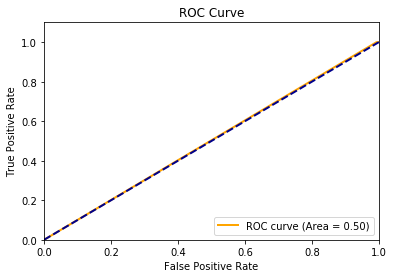

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_train_y,train_preds)
print("Confusion Matrix :\n",confusion_mat)
plt.plot(fpr_tr, tpr_tr, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % aucs_sp_tr[len(aucs_sp_tr)-1])
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

Confusion matrix ,ROC curve for observing the area under the curve with the test set <br>

AUC: 0.49

Confusion Matrix :
 [[69  2]
 [42  0]]


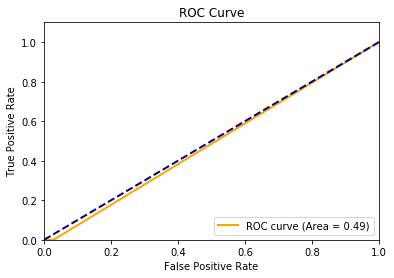

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test_y,test_preds)
print("Confusion Matrix :\n",confusion_mat)
plt.plot(fpr, tpr, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % aucs_sp[len(aucs_sp)-1])
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

# (1)(b)(v)


Inferences : <br>

*   Supervised learning has performed slightly better than semi-supervised learning.

*   Unsupervised learning  has performed poorly than supervised and semi-supervised learning and has given worse accuracy .

*  Spectral Clustering with rbf kernel at gamma =1 performs slightly better than K-means clustering . This is because spectral clustering is a much stable clustering algorithm than K-Means due to it's feature space transformation capabilities 





Results for Test Data : <br>

    Supervised	Semi-Supervised	Unsupervised-K-means	Unsupervised- Spectral 

> Acc 0.968731	0.957522	0.595870	0.6032448 <br>


> Auc	0.965230	0.952420	0.487793	0.4868544 <br>


> F1	 0.966560	0.954320	0.373973	0.3765470 <br>


> Prec.	0.968429	0.956932	0.336036	0.323423 <br>


> Rec.	 0.965230	0.952420	0.487793	0.4868544  <br>


# (2)(a)

Mounted drive into google colab runtime

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Loaded the Bank note authentication dataset as a pandas dataframe

In [0]:
import pandas as pd

df=pd.read_csv('/gdrive/My Drive/Homeworks/hw6/BankNote_Authentication.csv')

df.shape

(1372, 5)

Got a view of the first 5 entries of the bank note authentication dataset.

In [0]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Separated the response variable from the predictors

In [0]:
x = df.drop(df.columns[[4]], axis=1)
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [0]:
y=df.loc[:,'class']

# (2)(b)(i)

MONTE CARLO SIMULATION <br>

Repeat the below procedure 50 times in order to perform a monte carlo simulation of passive learning :

Trai a SVM with 10 randomly selected data points from the training set using  a linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.Repeat this procedure by adding another 10 randomly selected data points to already existent set of 10 data points sampled in the previous step  until we use all the 900 points without replacing the samples back into the training set . We will have 90 support vector machines that were trained using {10, 20, 30, ... , 900} data points and their respective 90 test errors. We have then successfully implemented passive learning.

Passive Learning

In [0]:
C_vals=[0.001,0.01,0.1,1,10,100,1000]
monte_range=list(range(0,50))

In [0]:
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.simplefilter("ignore")


passive_learner=list()
for s in monte_range:
  df=pd.read_csv('/gdrive/My Drive/Homeworks/hw6/BankNote_Authentication.csv')
  test_data=df.sample(472,random_state=random.randint(0,100))
  test_indices = test_data.index
  test_data = test_data.reset_index(drop=True)
  test_y = test_data['class']
  test_x = test_data.drop('class',axis=1)
  train_data = df.drop(index=test_indices)  
  test_err=list()
  val = StratifiedKFold(n_splits=90)
  train_x= train_data.drop(['class'],axis=1)
  train_x= train_x.reset_index(drop=True)
  train_y = train_data['class']
  train_y = train_y.reset_index(drop=True)
  train_data_update = pd.DataFrame()
  ctr=0
  for tr,te in val.split(train_x,train_y):
    ctr=ctr+1
    x1,y1=train_x.iloc[te], train_y.iloc[te]
    tr_df= pd.concat([x1,y1],axis=1)
    train_data_update = pd.concat([train_data_update,tr_df],axis=0)
    train_data_update_x = train_data_update.drop('class',axis=1)
    train_data_update_y = train_data_update['class']
    l1svm_score=list()
    
    if(ctr==1):
      for k in C_vals:
        mdl = LinearSVC(C=k,penalty='l1',dual=False)
        l1svm_score.append(cross_val_score(mdl,train_data_update_x,train_data_update_y,cv=5).mean())
    else:
      for k in C_vals:
        mdl = LinearSVC(C=k,penalty='l1',dual=False)
        l1svm_score.append(cross_val_score(mdl,train_data_update_x,train_data_update_y,cv=10).mean())

    C_chosen=C_vals[np.argmax([np.max(x) for x in l1svm_score])]
    mdl_passive=LinearSVC(C=C_chosen,penalty='l1',dual=False)
    mdl_passive=mdl_passive.fit(train_data_update_x,train_data_update_y)
    preds_passive = mdl_passive.predict(test_x)
    test_err.append(1-mdl_passive.score(test_x,test_y))
  


90 test errors corresponding to the 90 support vector machines trained on samples of different sample sizes

In [0]:
svm_no=range(1,91)
noofsamples=list(range(10,910,10))
result=pd.DataFrame({"SVM No.":svm_no,"No. of Samples":noofsamples,"AVG Test Error":test_err})
result

,SVM No.,No. of Samples,AVG Test Error
0,1,10,0.125000
1,2,20,0.048729
2,3,30,0.029661
3,4,40,0.036017
4,5,50,0.014831
...,...,...,...
85,86,860,0.012712
86,87,870,0.012712
87,88,880,0.012712
88,89,890,0.012712


# (2)(b)(ii)

MONTE CARLO SIMULATION:

Repeat the below procedure 50 times in order to perform a monte carlo simulation of active learning :

Train a SVM with 10 randomly selected data points from the training set using a linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation . Thereafter , we choose 10 data points in the training set that are closest to the decision boundary of the support vector machine and then add them to the already existent set of 10 data points sampled in the previous step without replacing the samples back into the training set . Since the data points closer to the margin of the SVM are essentially classified with lesser confidence the model tends to seek the labels for these data points alone so that it can maximise the confidence of classification of these specific data points . 

Repeat this process until all of the training data is used. We will have 90 support vector machines that were trained using {10, 20, 30, ... , 900} data points and their respective 90 test errors. We have thus successfully implemented active learning

Active Learning 

In [0]:
for s in monte_range:
  df=pd.read_csv('/gdrive/My Drive/Homeworks/hw6/BankNote_Authentication.csv')
  test_data=df.sample(472,random_state=random.randint(0,100))
  test_indices = test_data.index
  test_data = test_data.reset_index(drop=True)
  test_y = test_data['class']
  test_x = test_data.drop('class',axis=1)
  train_data = df.drop(index=test_indices)  
  test_err_active=list()
  val = StratifiedKFold(n_splits=90)
  train_x= train_data.drop(['class'],axis=1)
  train_x= train_x.reset_index(drop=True)
  train_y = train_data['class']
  train_y = train_y.reset_index(drop=True)
  train_data_update = pd.DataFrame()
  ctr=0
  for tr,te in val.split(train_x,train_y):
    x1,y1=train_x.iloc[te], train_y.iloc[te]
    tr_df= pd.concat([x1,y1],axis=1)
    train_data_update = pd.concat([train_data_update,tr_df],axis=0)
    train_data_update_x = train_data_update.drop('class',axis=1)
    train_data_update_y = train_data_update['class']
    break;
  for i in range(0,90):
    l1svm_score=list()
    ctr=ctr+1
    train_x= train_x.reset_index(drop=True)
    if(ctr==1):
      for k in C_vals:
        mdl = LinearSVC(C=k,penalty='l1',dual=False)
        l1svm_score.append(cross_val_score(mdl,train_data_update_x,train_data_update_y,cv=5).mean())
    else:
      for k in C_vals:
        mdl = LinearSVC(C=k,penalty='l1',dual=False)
        l1svm_score.append(cross_val_score(mdl,train_data_update_x,train_data_update_y,cv=10).mean())

    C_chosen=C_vals[np.argmax([np.max(x) for x in l1svm_score])]
    mdl_active=LinearSVC(C=C_chosen,penalty='l1',dual=False)
    mdl_active=mdl_active.fit(train_data_update_x,train_data_update_y)
    nearest_pt = mdl_active.decision_function(train_x)
    nearest_pts= np.abs(nearest_pt)
        
    dist =  pd.DataFrame(nearest_pts)
    sorted_dist = dist.sort_values(0)
    sorted_dist = sorted_dist.iloc[0:10,]
    indices = sorted_dist.index
        
    tr_samp_add  =  train_data.iloc[indices,:]
    train_x  = train_x.drop(index = indices)

    preds_active = mdl_active.predict(test_x)
    train_data_update = pd.concat([train_data_update,tr_samp_add],axis=0)
    train_data_update.reset_index(drop=True,inplace=True)
    train_data_update_y = train_data_update['class']
    train_data_update_x = train_data_update.drop('class',axis=1)
    test_err_active.append(1-mdl_active.score(test_x,test_y))
    
    
    


90 test errors corresponding to the 90 support vector machines trained on samples of different sample sizes

In [0]:
result_active=pd.DataFrame({"SVM No.":svm_no,"No. of Samples":noofsamples,"AVG Test Error":test_err_active})
result_active

,SVM No.,No. of Samples,AVG Test Error
0,1,10,0.171610
1,2,20,0.033898
2,3,30,0.042373
3,4,40,0.038136
4,5,50,0.023305
...,...,...,...
85,86,860,0.010593
86,87,870,0.010593
87,88,880,0.010593
88,89,890,0.010593


# (2)(C)

Comparison of learning curves otained by Monte-Carlo simulation.

Plot reprsenting the average test error versus number of training instances for both active and passive learning that we have implemented  

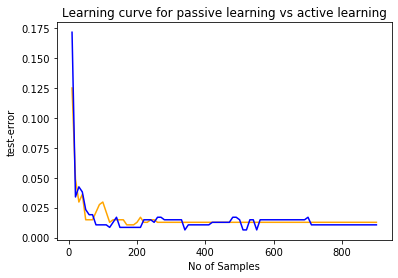

In [0]:
import matplotlib.pyplot as plt


passive=plt.plot(noofsamples,test_err,color='orange')
active=plt.plot(noofsamples,test_err_active,color='blue')
plt.xlabel('No of Samples')
plt.ylabel('test-error')
plt.title('Learning curve for passive learning vs active learning')
plt.show()


From the above plot we can conclude that active learning reaches the minimal test error faster than passive learning .

The error rate for both the learning curves decreases rapidly with the addition of more data points . This drop is more pronounced in the case of active learning than passive learning . As the number of samples continues to increase , the test error for both these learners in this learning curve reaches a saturation .